# PRCP-1025-FlightPricePrediction

### Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey according### ly.

Dataset Link:
We have to analyze the flight fare prediction using Machine Learning dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more
Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/flight-f### are.zip

Attribute Information : 

1.	Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2.	Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
3.	Source: This column holds the name of the place from where the passenger’s journey will start.
4.	Destination: This column holds the name of the place to where passengers wanted to travel.
5.	Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
6.	Arrival_Time: Arrival time is when the passenger will reach his/her destination.
7.	Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
8.	Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
9.	Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
10.	Price: Price of the flight for a complete journey including all the expens### es before onboarding.
Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the bes### t model for production.

Report on Challenges faced

Create a report which should include challenges you faced on data and what technique used with proper reason.


In [1]:
#Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To display all features
pd.set_option('display.max_columns', 50)

#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
flight_pred=pd.read_excel("Flight_Fare.xlsx")
flight_pred

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Basic Checks
to understand the nature of the dataset 

In [3]:
flight_pred.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_pred.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
flight_pred.shape

(10683, 11)

In [6]:
flight_pred.describe() #Gives statistical information on the dataset

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
flight_pred.info() #porvides basic information on the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


####  Check for null values

In [8]:
#check null values
flight_pred.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Drop the row with Null Values
flight_pred=flight_pred.dropna()
flight_pred.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Check for duplicated rows

In [10]:
flight_pred.duplicated().sum()

220

In [11]:
#Since we have 220 duplicate columns, lets drop these columns
flight_pred.drop_duplicates(inplace=True)
flight_pred.count()

Airline            10462
Date_of_Journey    10462
Source             10462
Destination        10462
Route              10462
Dep_Time           10462
Arrival_Time       10462
Duration           10462
Total_Stops        10462
Additional_Info    10462
Price              10462
dtype: int64

In [12]:
flight_pred.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# EDA

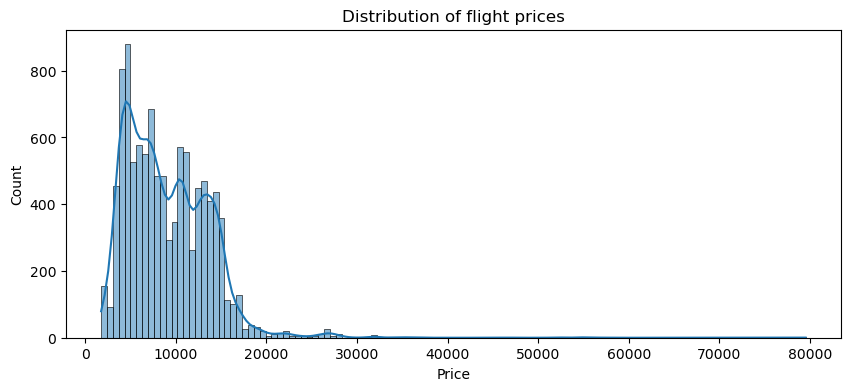

In [13]:
# Univariate analysis of the target variable

#Histplot for numerical columns

plt.figure(figsize=(10,4))
sns.histplot(flight_pred['Price'],kde=True)
plt.title("Distribution of flight prices")
plt.show()        

#### Inference
1. As seen from above plot, it is evident that feature 'Price' contains skewed data which needs to be handled

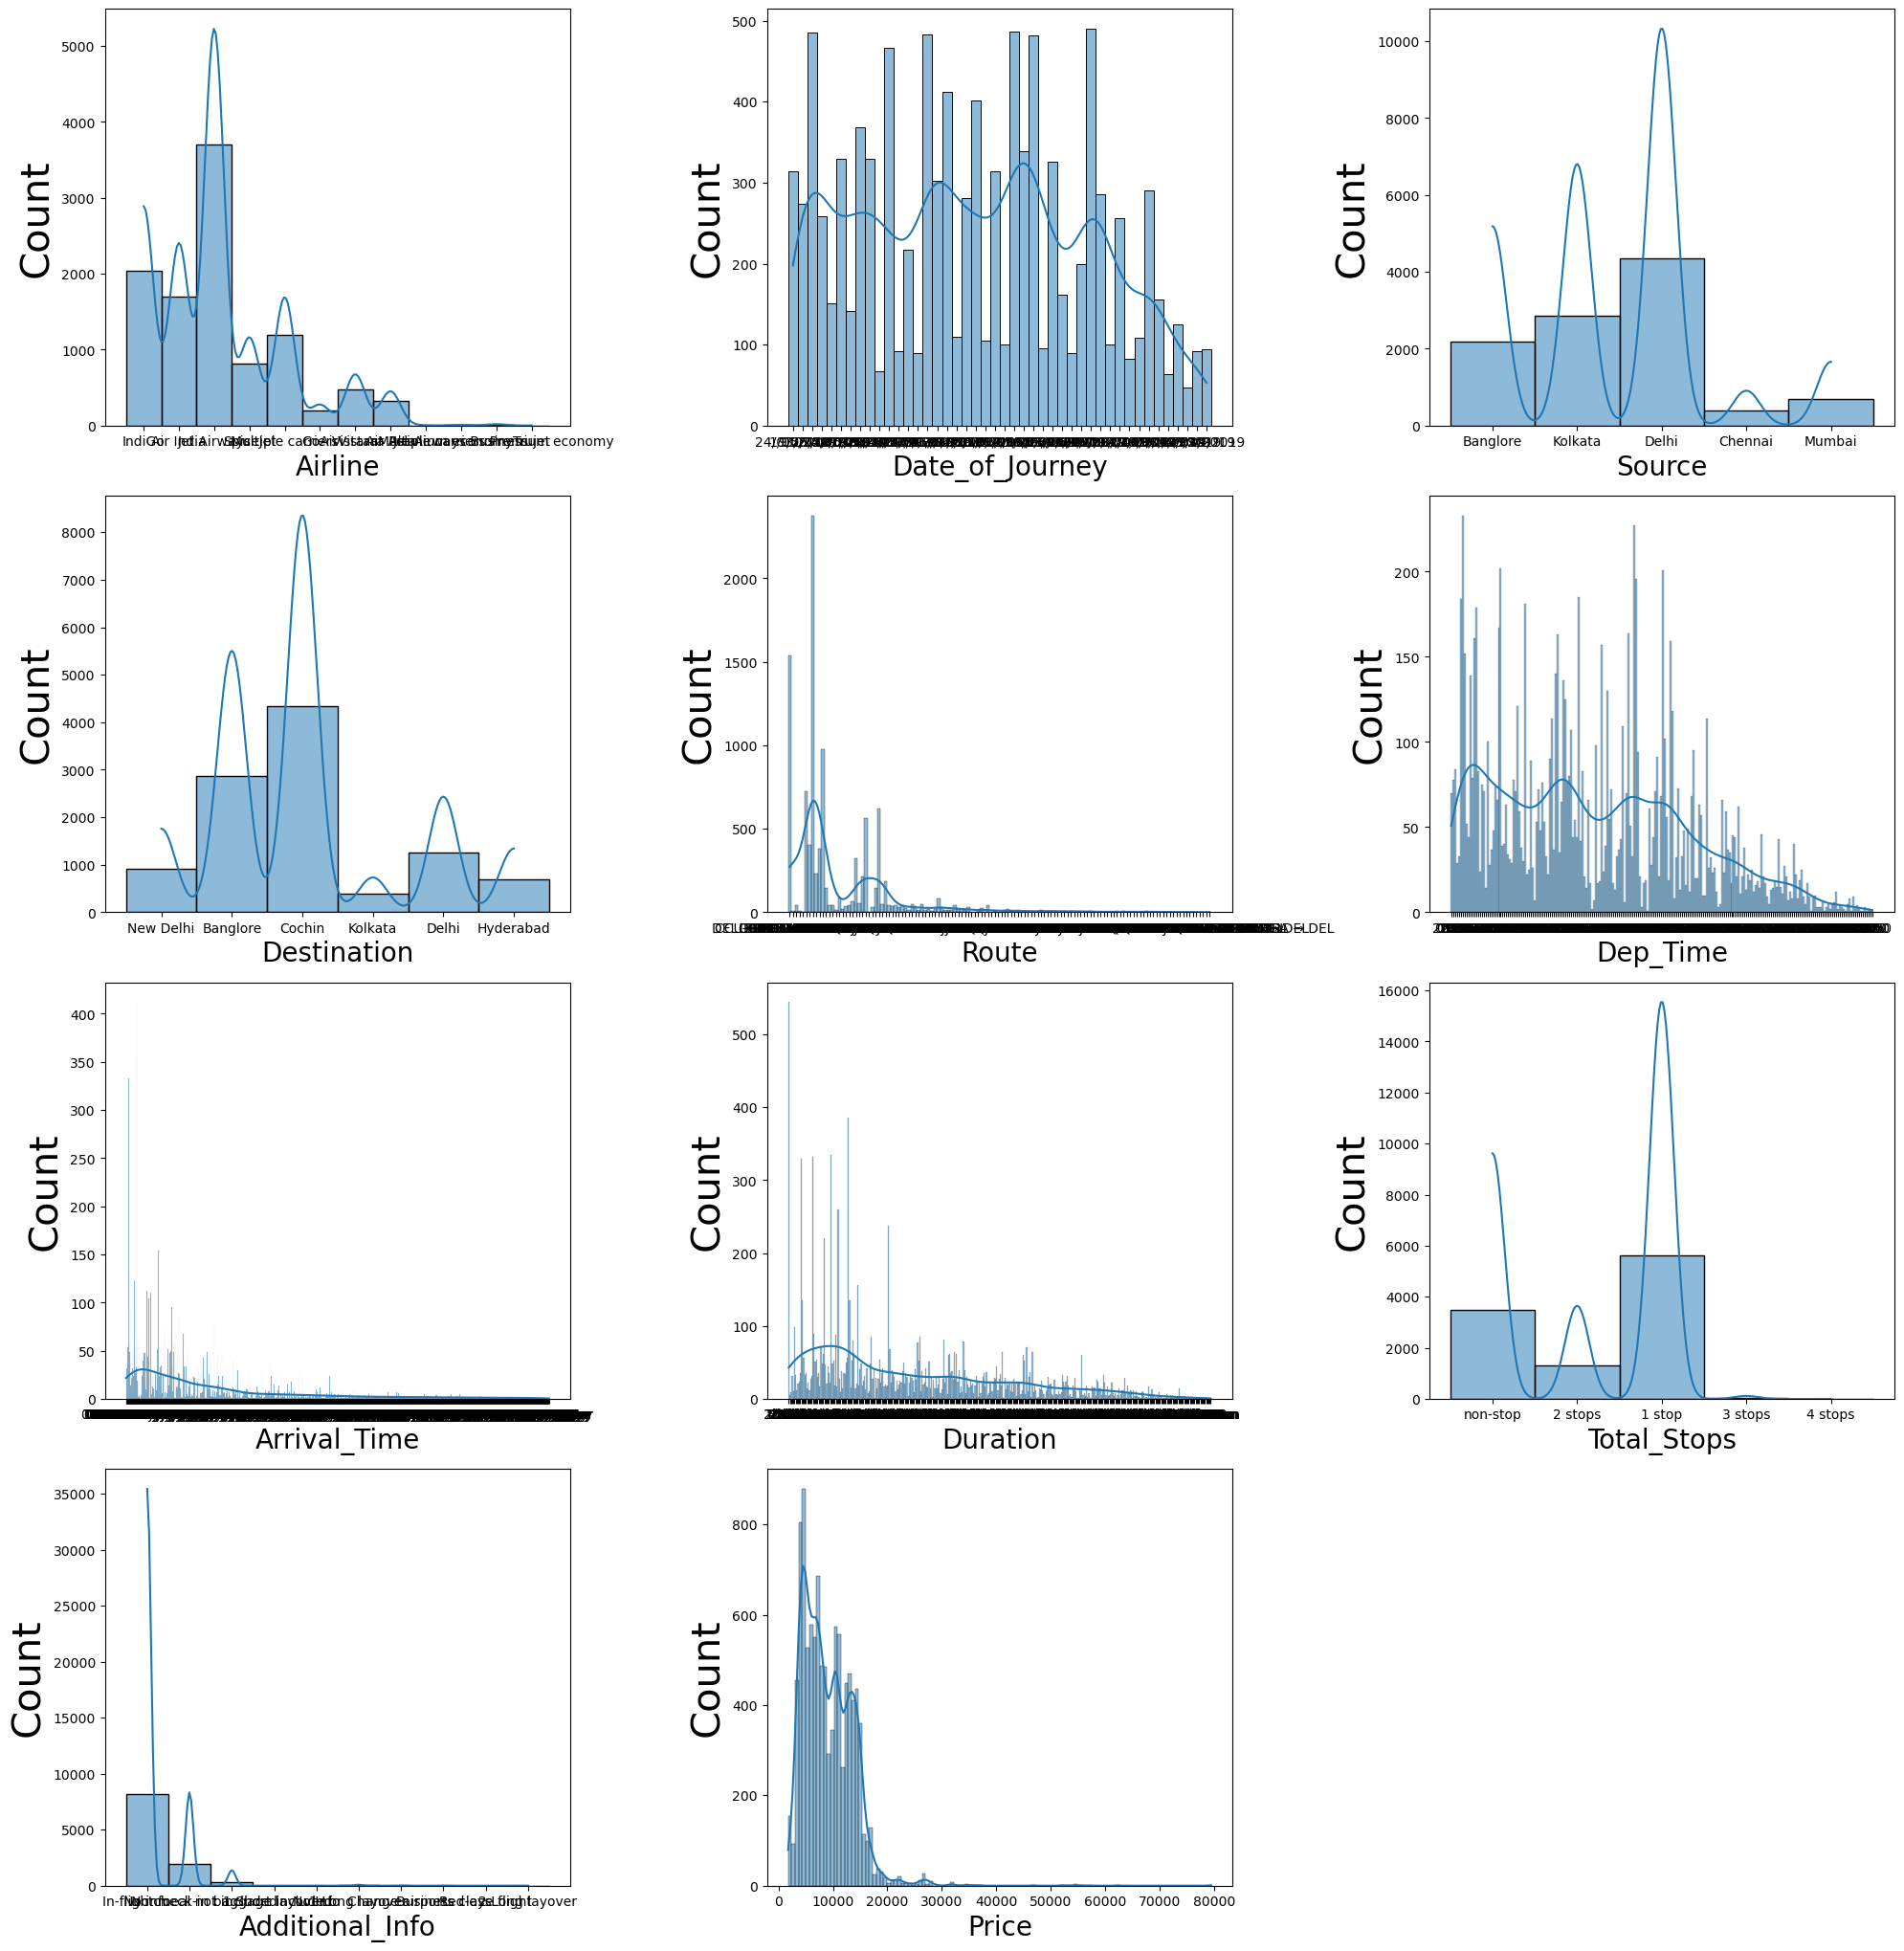

In [14]:
#Column vs Count of Flight__Prediction dataset
plt.figure(figsize=(20,25),facecolor='white') 
plotnumber=1

for column in flight_pred.columns: 
    if plotnumber<=15:
        plt.subplot(5,3,plotnumber) 
        sns.histplot(flight_pred[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=30)
    plotnumber+=1
plt.tight_layout()

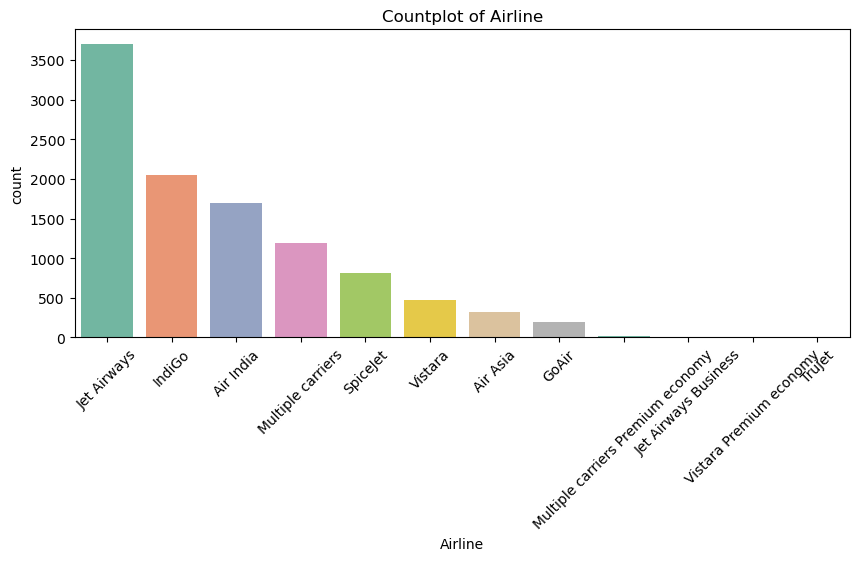

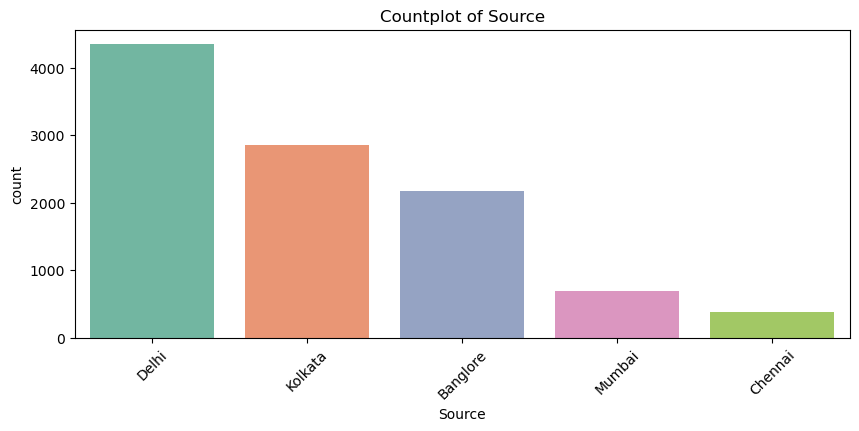

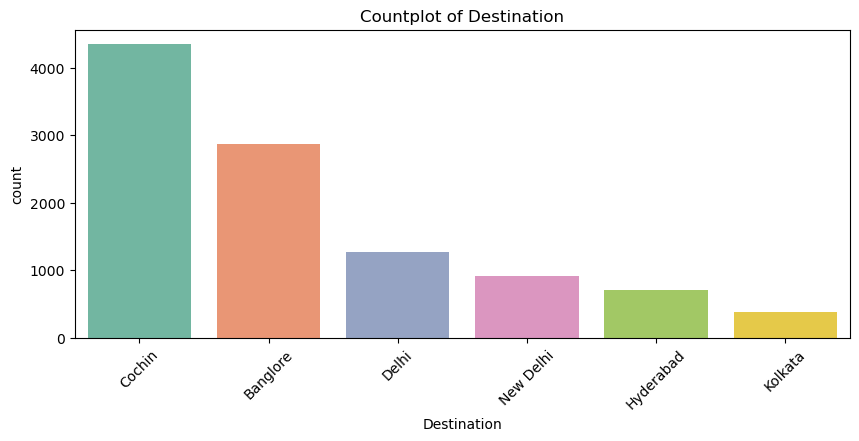

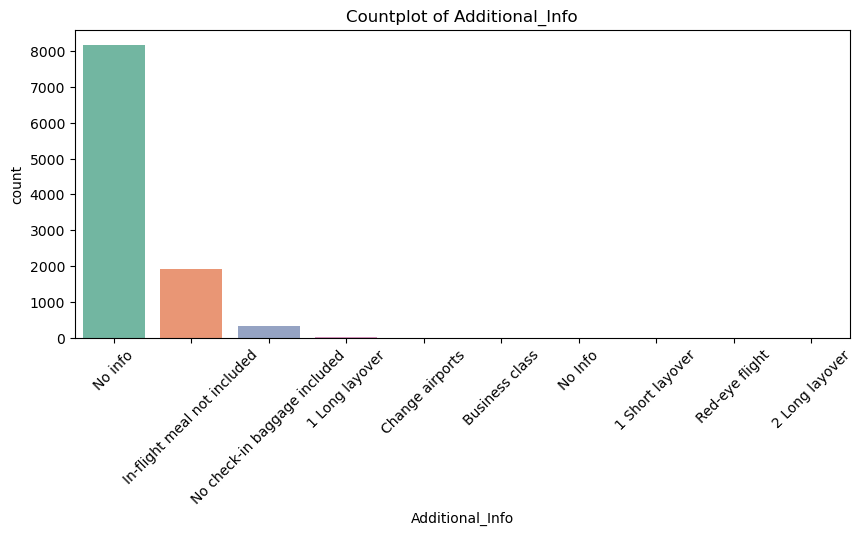

In [15]:
#Countplot for categorical columns 

for cols in ['Airline','Source','Destination','Additional_Info']:
    plt.figure(figsize=(10,4))
    sns.countplot(data=flight_pred,x=cols,order=flight_pred[cols].value_counts().index,palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {cols}")
    plt.show()
    

### Inference
As from other result,
1. JetAirways is the most preferred airline with highest travel count followed by Indigo and AirIndia
2. Delhi is the source for majority of airlines followed by Kolkatta. Chennai has minimum number of takes during this period
3. Maximum flights lands in Cochin.
4. Majority of Airways doesnot contain additional information/additional facilities for passengers

<Figure size 1800x700 with 0 Axes>

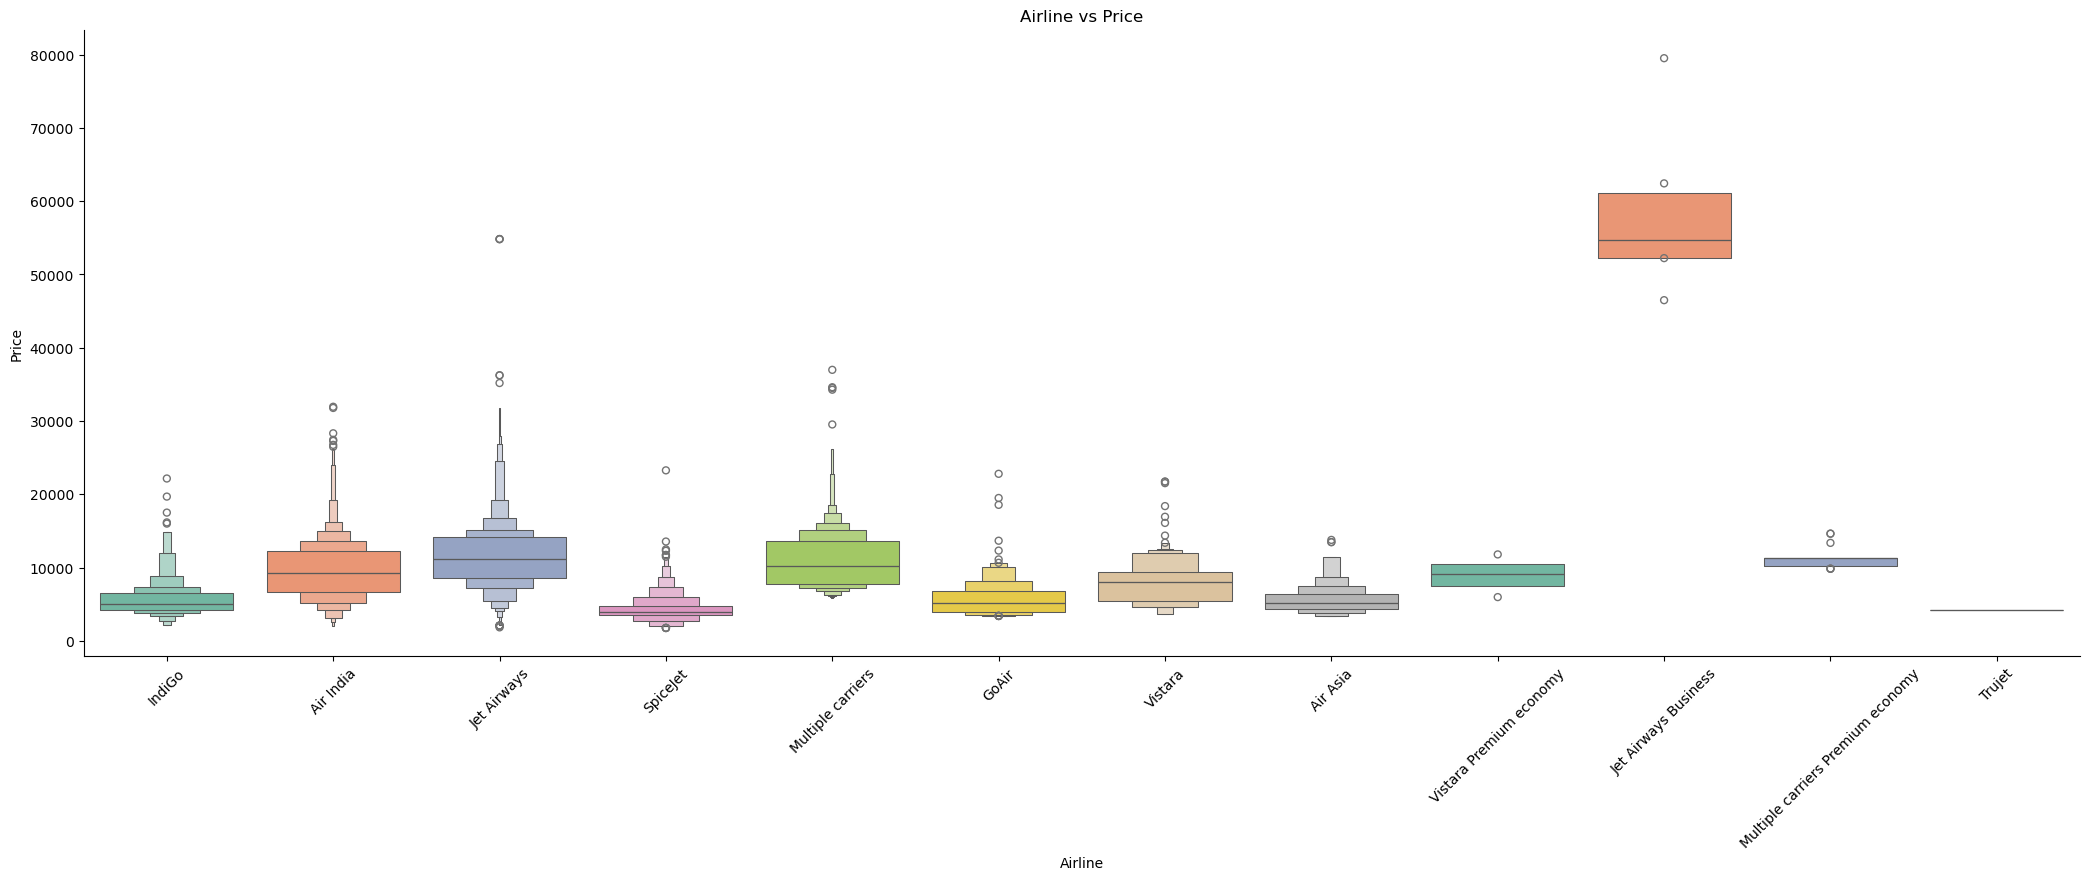

In [16]:
#bivariate analysis between airline and its prices

plt.figure(figsize=(18,7))

sns.catplot(x='Airline',y='Price',data=flight_pred,palette='Set2',kind="boxen", height = 7, aspect = 3)
plt.xticks(rotation=45)
plt.title("Airline vs Price")
plt.show()


### Inference
1. It is inferred that JetAirways Business is costlier compared to other airways. The price quoted between 50000 - 80000 rupees

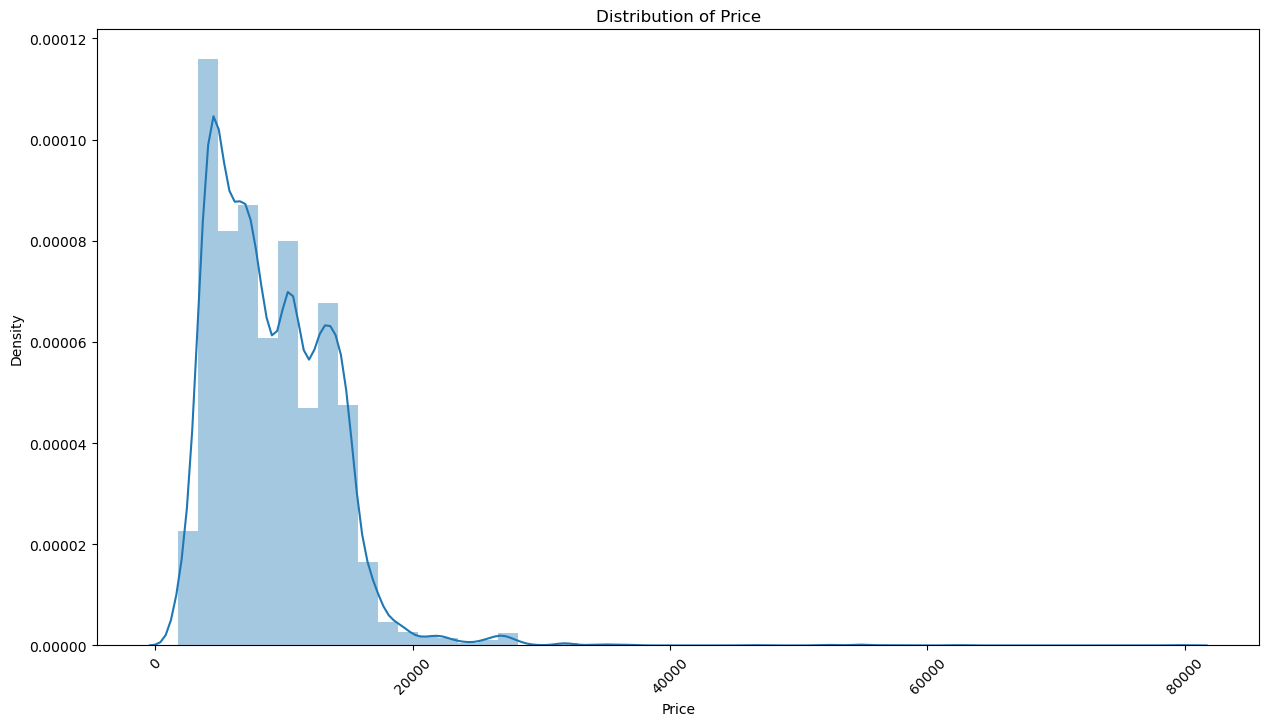

In [17]:
plt.figure(figsize=(15,8))

sns.distplot(flight_pred['Price'])
plt.xticks(rotation=45)
plt.title("Distribution of Price")
plt.show()

### Inference
1. Majority of flights is priced under 20000 rupees.
2. Most frequent flight journey takes between rice range of 5000 - 10000 rupees
3. It is observed that minimum value is 1759 and maximum value is 79512 rupees

<Figure size 1800x700 with 0 Axes>

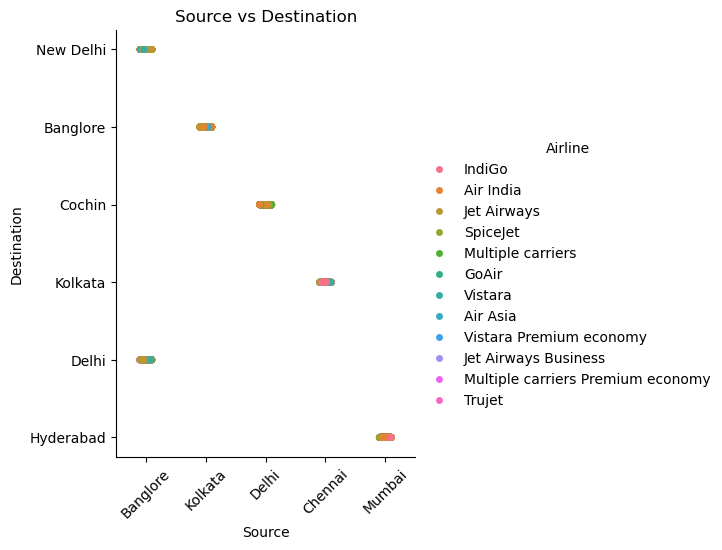

In [18]:
#bivariate analysis betweeen source and Destination

plt.figure(figsize=(18,7))

sns.catplot(x='Source',y='Destination',data=flight_pred,hue='Airline')
plt.xticks(rotation=45)
plt.title("Source vs Destination")
plt.show()

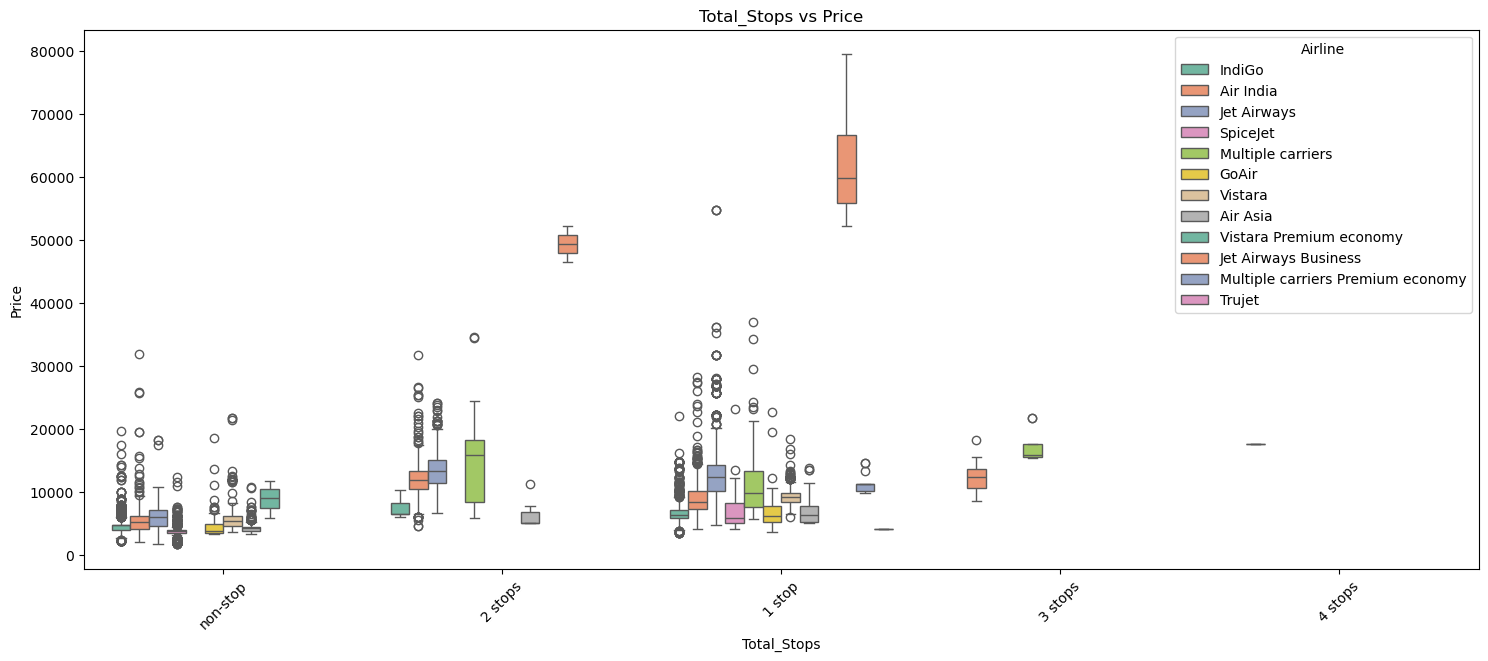

In [19]:
plt.figure(figsize=(18,7))

sns.boxplot(x='Total_Stops',y='Price',data=flight_pred,palette='Set2',hue="Airline")
plt.xticks(rotation=45)
plt.title("Total_Stops vs Price")
plt.show()

### Inference
1. Majority of Airways comes under Non-Stop and 1 Stop
2. Only less number of Airways takes 3 to 4 stops for single flight.

<Figure size 1800x700 with 0 Axes>

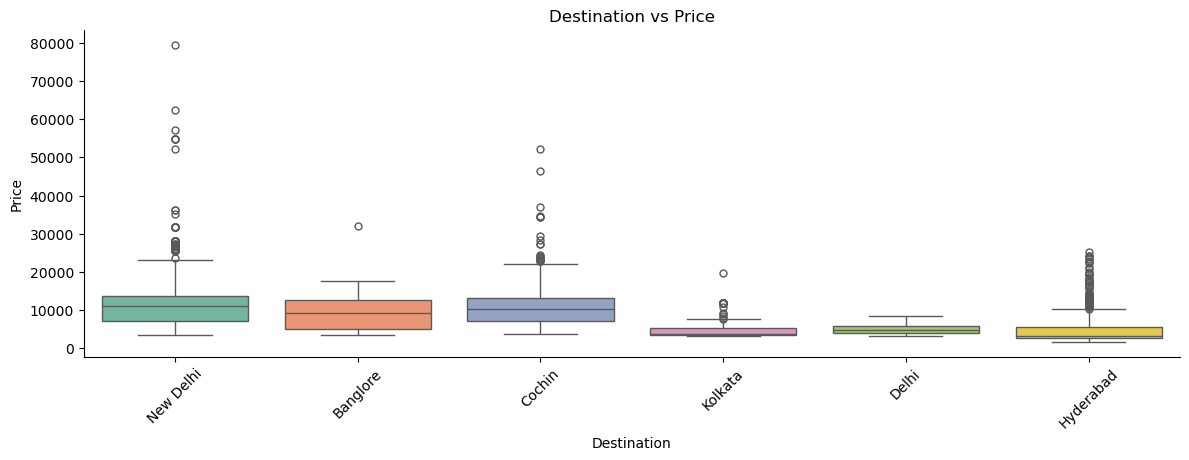

In [20]:
plt.figure(figsize=(18,7))

sns.catplot(x='Destination',y='Price',data=flight_pred,palette='Set2',kind="box", height = 4, aspect = 3)
plt.xticks(rotation=45)
plt.title("Destination vs Price")
plt.show()


### Inference
1. New Delhi is priced highest by Airways for a Destination followed by Cochin
2. Banglore is most frequently desired place to travel which has maximum distribution in above graph

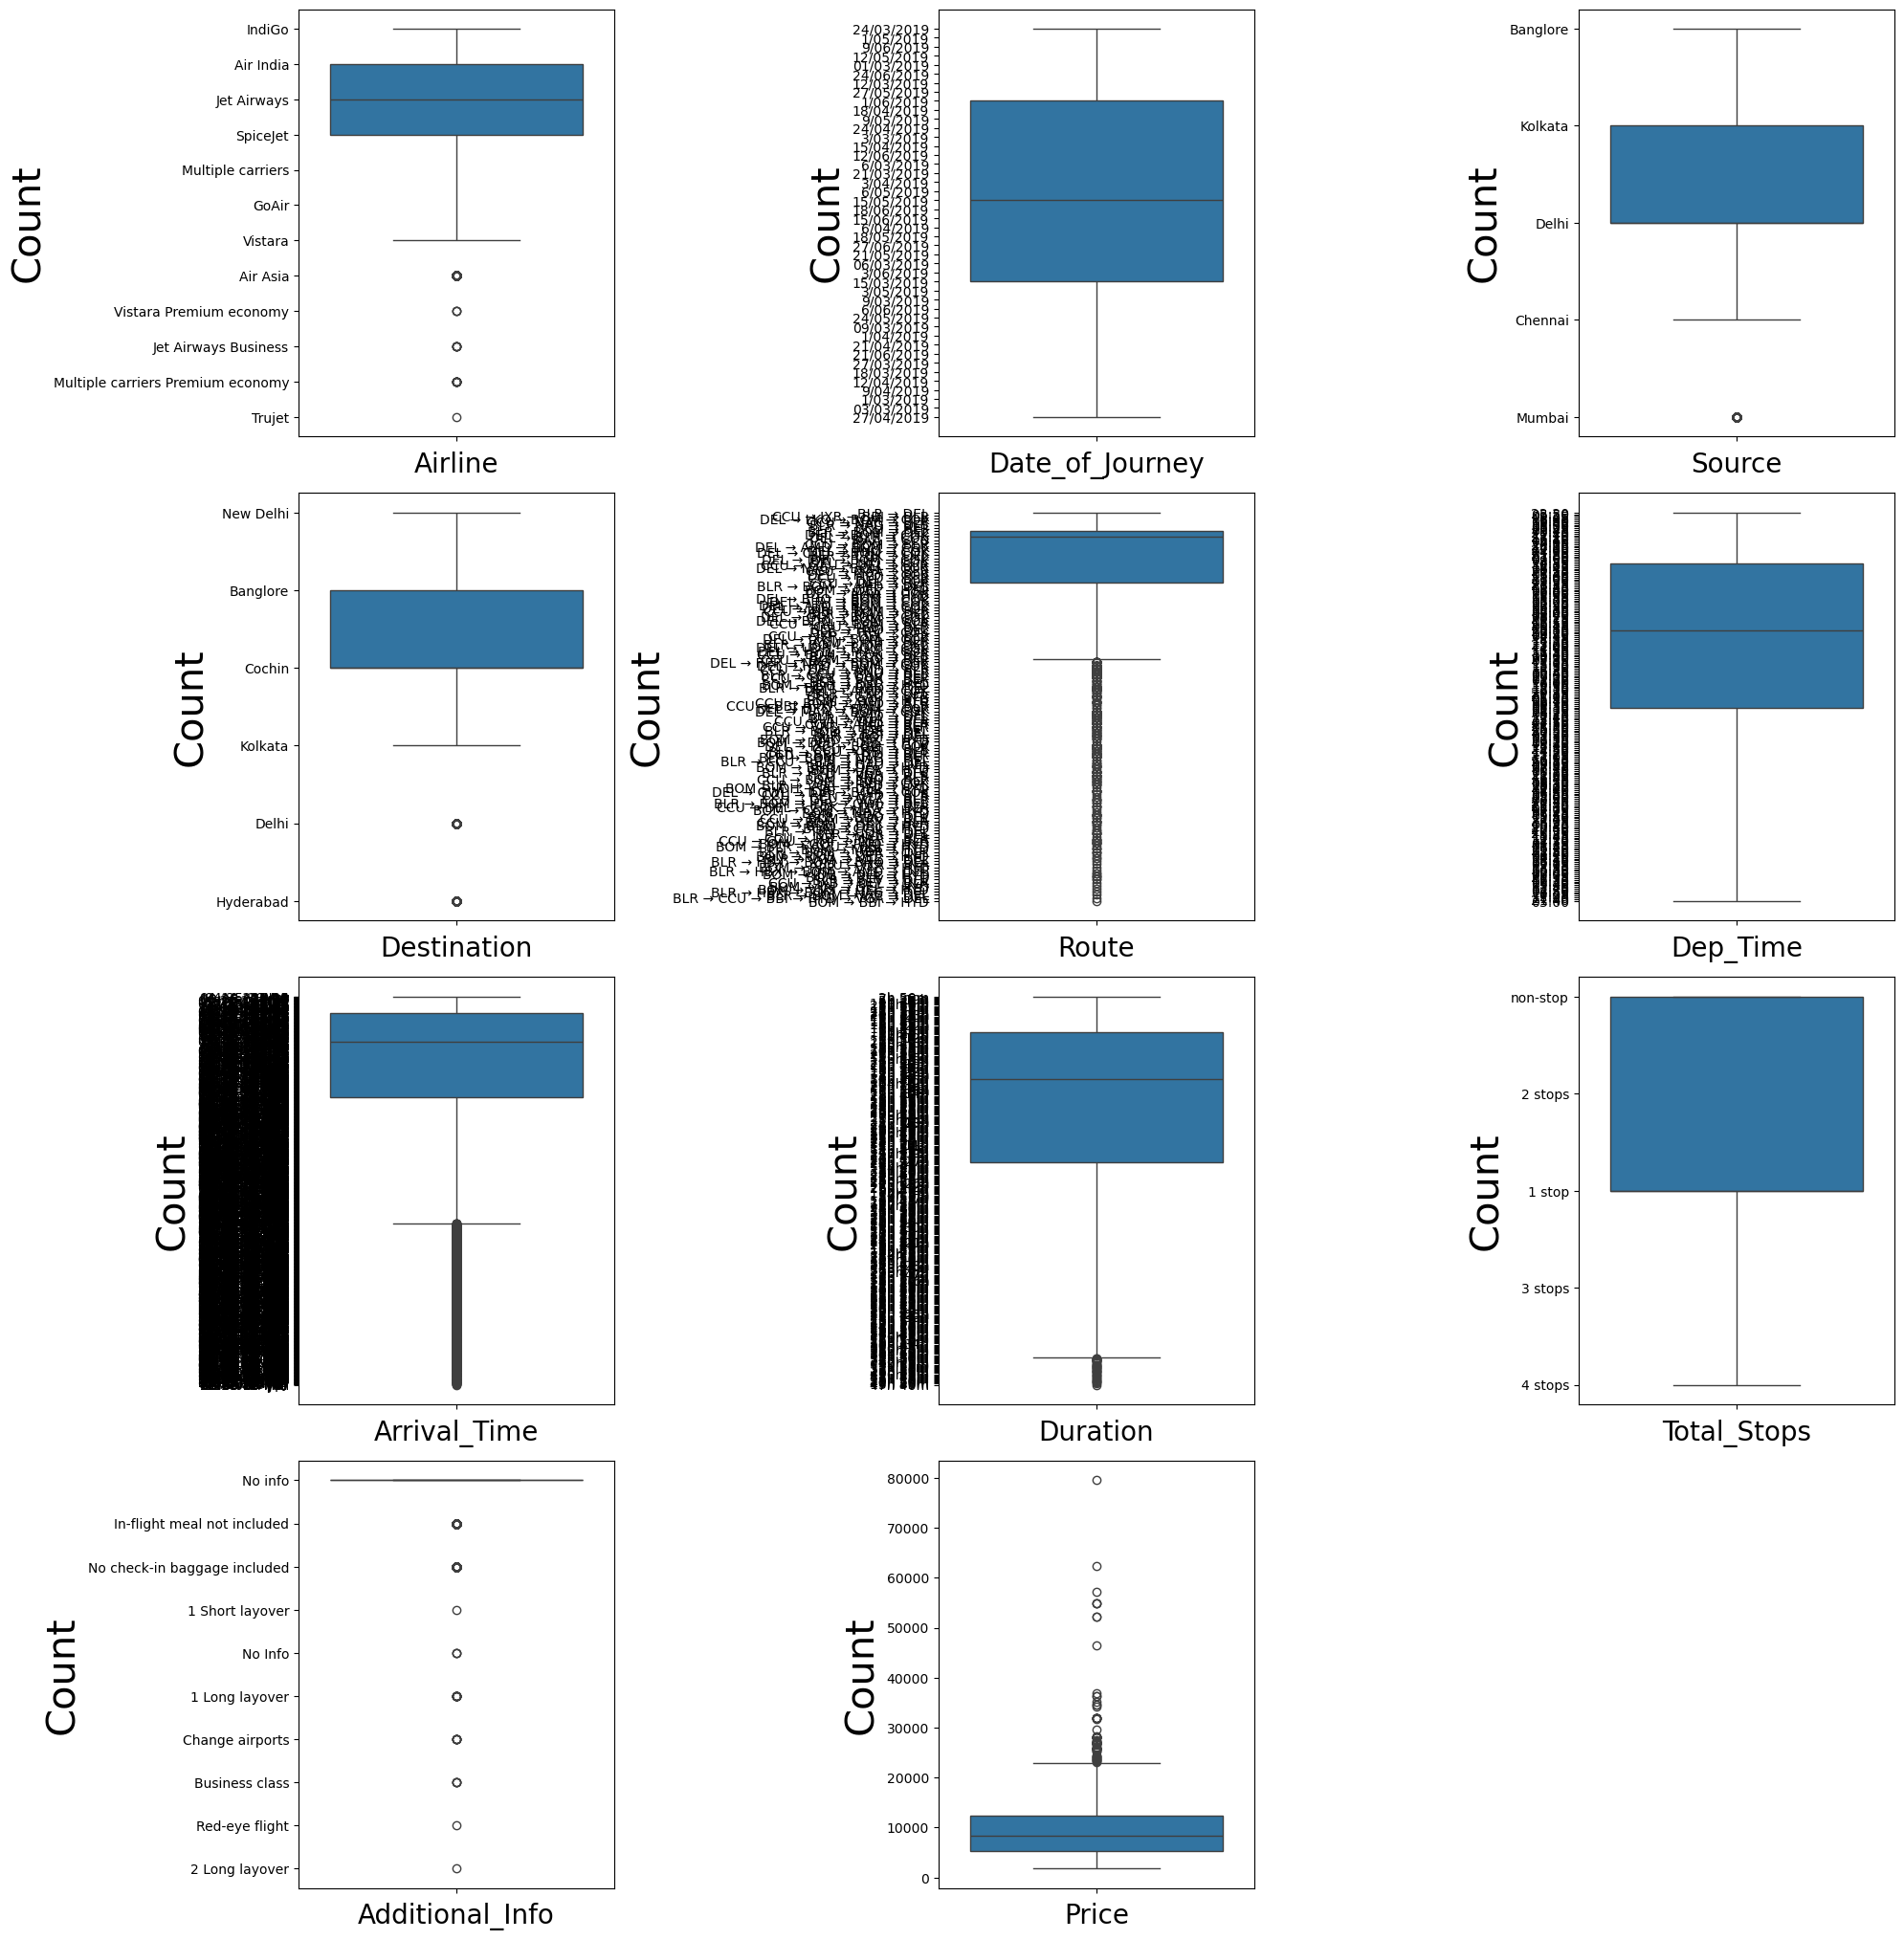

In [21]:
#outliers check
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in flight_pred.columns:
    if plotnumber<=15:
        plt.subplot(5,3,plotnumber)
        sns.boxplot(flight_pred[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=30)
    plotnumber+=1
plt.tight_layout()

### Inference
1. As observed in above graph, we need to handle outliers.
2. Majority of columns are categorical. Lets preprocess the data before building the models

## Feature Engineering

### Insights :Perform the feature understanding 
1. the main goal is to handle categorical columns from the given dataset
2. Change/Modify all provided features to numerical data type to get better accuracy as it contains continous numerical target column.
3. In a particular feature, Group the data if the significance is low
4. Split the data to get better data visibility
5. Remove/Handle unwanted strings from dataset

In [22]:
#lets split Date_of_Journey into year, month and day
flight_pred["Year_of_Journey"]=flight_pred["Date_of_Journey"].apply(lambda x: x.split("/")[2])
flight_pred["Month_of_Journey"]=flight_pred["Date_of_Journey"].apply(lambda x: x.split("/")[1])
flight_pred["Day_of_Journey"]=flight_pred["Date_of_Journey"].apply(lambda x: x.split("/")[0])

In [23]:
# Extract hours and minutes using regular expressions for Duration_hours feature
flight_pred[['Duration_hours', 'Duration_minutes']] = flight_pred['Duration'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')

flight_pred['Duration_hours'] = pd.to_numeric(flight_pred['Duration_hours'], errors='coerce').fillna(0).astype(int)
flight_pred['Duration_minutes'] = pd.to_numeric(flight_pred['Duration_minutes'], errors='coerce').fillna(0).astype(int)

In [24]:
#Extarct Dep hour and Dep Minute from DepTime
flight_pred[['Dep_Hour', 'Dep_Minute']] = flight_pred['Dep_Time'].str.split(':', expand=True)

In [25]:
#Extract Arrival hour and Arrival Minute from Arrival Time
flight_pred['Arrival_Time'] = flight_pred['Arrival_Time'].apply(lambda x: x.split(" ")[0])
flight_pred[['Arrival_Hour', 'Arrival_Minute']] = flight_pred['Arrival_Time'].str.split(':', expand=True)

In [26]:
#Handling Total Stops - Remove unwanted strings
flight_pred['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [27]:
#Since stops indicate count, lets convert it to numerical
flight_pred['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)
flight_pred['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [28]:
flight_pred['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [29]:
#Handling case sensitive data in feature
#Replacing with same value as both have same meaning
flight_pred['Additional_Info'].replace('No Info','No info',inplace=True)
flight_pred['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
#Grouping least significant data - Airline
flight_pred['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [31]:
airline_valuestoChange=['Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet','GoAir']
flight_pred['Airline'].replace({val:'Others' for val in airline_valuestoChange},inplace=True)
flight_pred['Airline'].value_counts()

Airline
Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
Others                217
Name: count, dtype: int64

In [32]:
#Grouping least significant Data - Additional Info
flight_pred['Additional_Info'].value_counts()

Additional_Info
No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [33]:
additionalinfo_valuestoChange=['1 Short layover','Red-eye flight','2 Long layover','Business class','Change airports','1 Long layover']
flight_pred['Additional_Info'].replace({val:'Other infos' for val in additionalinfo_valuestoChange},inplace=True)
flight_pred['Additional_Info'].value_counts()

Additional_Info
No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
Other infos                       33
Name: count, dtype: int64

In [34]:
flight_pred

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,2019,03,24,2,50,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,2019,05,1,7,25,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,2019,06,9,19,0,09,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,2019,05,12,5,25,18,05,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2019,03,01,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,2019,04,9,2,30,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,2019,04,27,2,35,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,2019,04,27,3,0,08,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,2019,03,01,2,40,11,30,14,10


In [35]:
#Since we feature engineered Departure time, Arrival time,Duration & Date of Journey, we drop those columns
flight_pred=flight_pred.drop('Dep_Time', axis=1)
flight_pred=flight_pred.drop('Date_of_Journey', axis=1)
flight_pred=flight_pred.drop('Arrival_Time', axis=1)
flight_pred=flight_pred.drop('Duration', axis=1)

#Since total number of stops, Source, Destination are available we can drop Route Column
flight_pred=flight_pred.drop('Route', axis=1)

#Since year does not have any significance(has same year for all rows), lets drop the column
flight_pred.drop("Year_of_Journey",axis=1,inplace=True)

In [36]:
flight_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Total_Stops       10462 non-null  int64 
 4   Additional_Info   10462 non-null  object
 5   Price             10462 non-null  int64 
 6   Month_of_Journey  10462 non-null  object
 7   Day_of_Journey    10462 non-null  object
 8   Duration_hours    10462 non-null  int32 
 9   Duration_minutes  10462 non-null  int32 
 10  Dep_Hour          10462 non-null  object
 11  Dep_Minute        10462 non-null  object
 12  Arrival_Hour      10462 non-null  object
 13  Arrival_Minute    10462 non-null  object
dtypes: int32(2), int64(2), object(10)
memory usage: 1.4+ MB


In [37]:
#Dataset contains Object and Int datatype in features. Convert all columns to single data type - int
cols_to_convert = [
    'Dep_Hour', 'Dep_Minute',
    'Arrival_Hour', 'Arrival_Minute', 'Duration_hours','Month_of_Journey','Day_of_Journey','Duration_minutes'
]

for col in cols_to_convert:
    flight_pred[col] = pd.to_numeric(flight_pred[col], errors='coerce')  # Convert safely
    flight_pred[col] = flight_pred[col].fillna(0).astype(int)            # Replace NaNs if any
flight_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Total_Stops       10462 non-null  int64 
 4   Additional_Info   10462 non-null  object
 5   Price             10462 non-null  int64 
 6   Month_of_Journey  10462 non-null  int32 
 7   Day_of_Journey    10462 non-null  int32 
 8   Duration_hours    10462 non-null  int32 
 9   Duration_minutes  10462 non-null  int32 
 10  Dep_Hour          10462 non-null  int32 
 11  Dep_Minute        10462 non-null  int32 
 12  Arrival_Hour      10462 non-null  int32 
 13  Arrival_Minute    10462 non-null  int32 
dtypes: int32(8), int64(2), object(4)
memory usage: 1.1+ MB


## EDA Analysis - After Feature Engineering

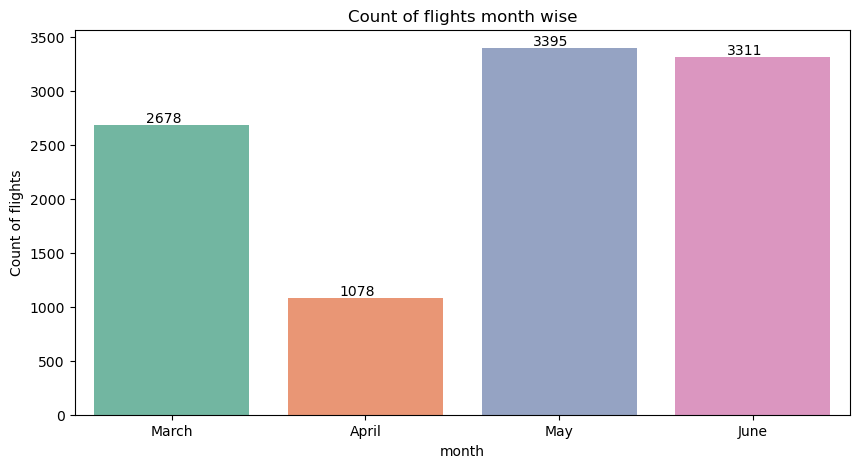

In [38]:
import calendar
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month_of_Journey', data = flight_pred,palette='Set2')

month_nums = sorted(flight_pred['Month_of_Journey'].unique())
month_labels = [calendar.month_name[int(m)] for m in month_nums]
ax.set_xticklabels(month_labels)

plt.xlabel('month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x() + p.get_width() / 3, p.get_height() + 1),va='bottom', color='black')

### Inference: 
Here in the above graph we have plotted the count plot for journey in a month vs several flights
1. May has the most number of flights travelled.
2. April has very least number of filghts travelled

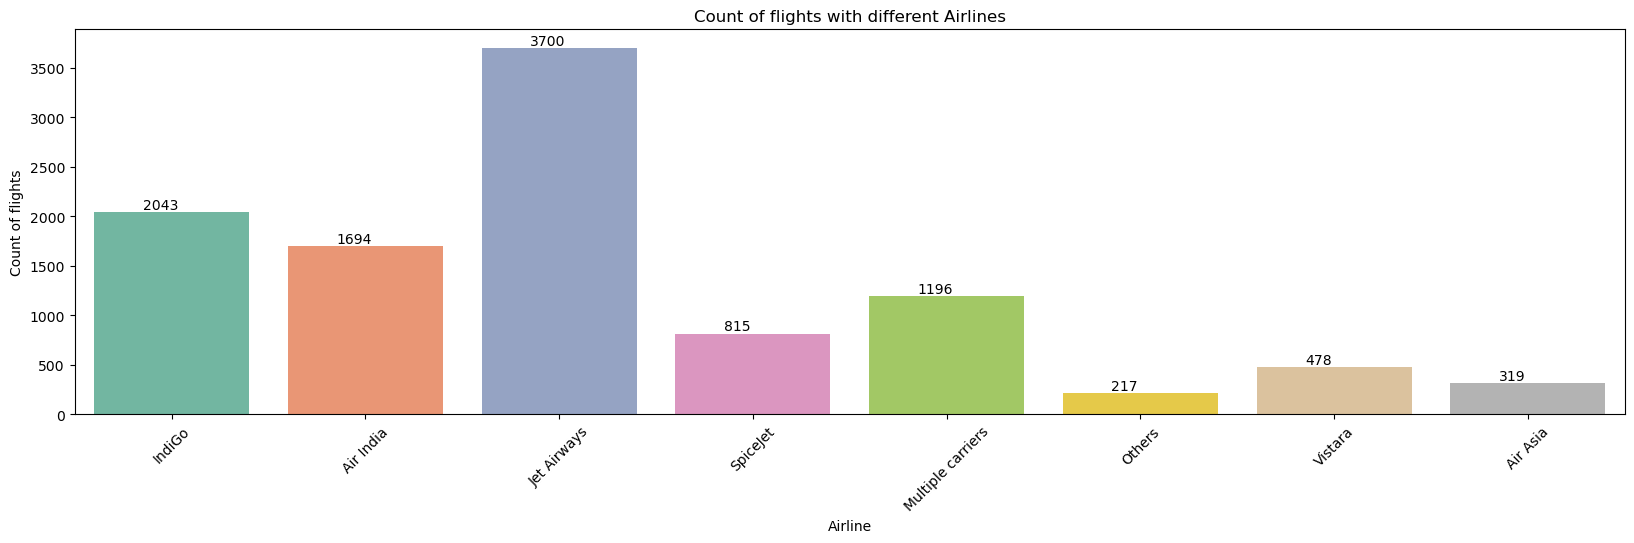

In [39]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = flight_pred,palette='Set2')
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

## Inference: 
1. Apart from other airways, Air Asia got least number of flights boarded
2. Jet Airways has the most flight boarded in the provided timeline.

In [40]:
import pandas_profiling
profile = flight_pred.profile_report(title="FlightPricePrediction")
profile.to_file("FlightPricePrediction_Analysis_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Encoding
Convert the categorical values using Encoding 

In [41]:
#Check for Categorical features in dataset
flight_pred

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,3,24,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,0,No info,4145,4,27,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,0,No info,7229,4,27,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,0,No info,12648,3,1,2,40,11,30,14,10


In [42]:
#Select the categorical columns which need to encode
columns_toencode=["Airline","Source","Destination","Additional_Info"]

In [43]:
#In this dataset, we have 6 columns as categorical value. 
#Using encoding, convert categorical values to numerical.

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
for column in columns_toencode:
    encoded=ohe.fit_transform(flight_pred[[column]])
    # Convert to DataFrame
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([column]),index=flight_pred.index)
    flight_pred=pd.concat([flight_pred.drop(column,axis=1),encoded_df],axis=1)
flight_pred

,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air Asia,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Other infos
0,0,3897,3,24,2,50,22,20,1,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,7662,5,1,7,25,5,50,13,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,13882,6,9,19,0,9,25,4,25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6218,5,12,5,25,18,5,23,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,13302,3,1,4,45,16,50,21,35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,2,30,19,55,22,25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,0,4145,4,27,2,35,20,45,23,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,0,7229,4,27,3,0,8,20,11,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,0,12648,3,1,2,40,11,30,14,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
flight_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10462 non-null  int64  
 1   Price                                         10462 non-null  int64  
 2   Month_of_Journey                              10462 non-null  int32  
 3   Day_of_Journey                                10462 non-null  int32  
 4   Duration_hours                                10462 non-null  int32  
 5   Duration_minutes                              10462 non-null  int32  
 6   Dep_Hour                                      10462 non-null  int32  
 7   Dep_Minute                                    10462 non-null  int32  
 8   Arrival_Hour                                  10462 non-null  int32  
 9   Arrival_Minute                                10462 non-null  int3

<Axes: >

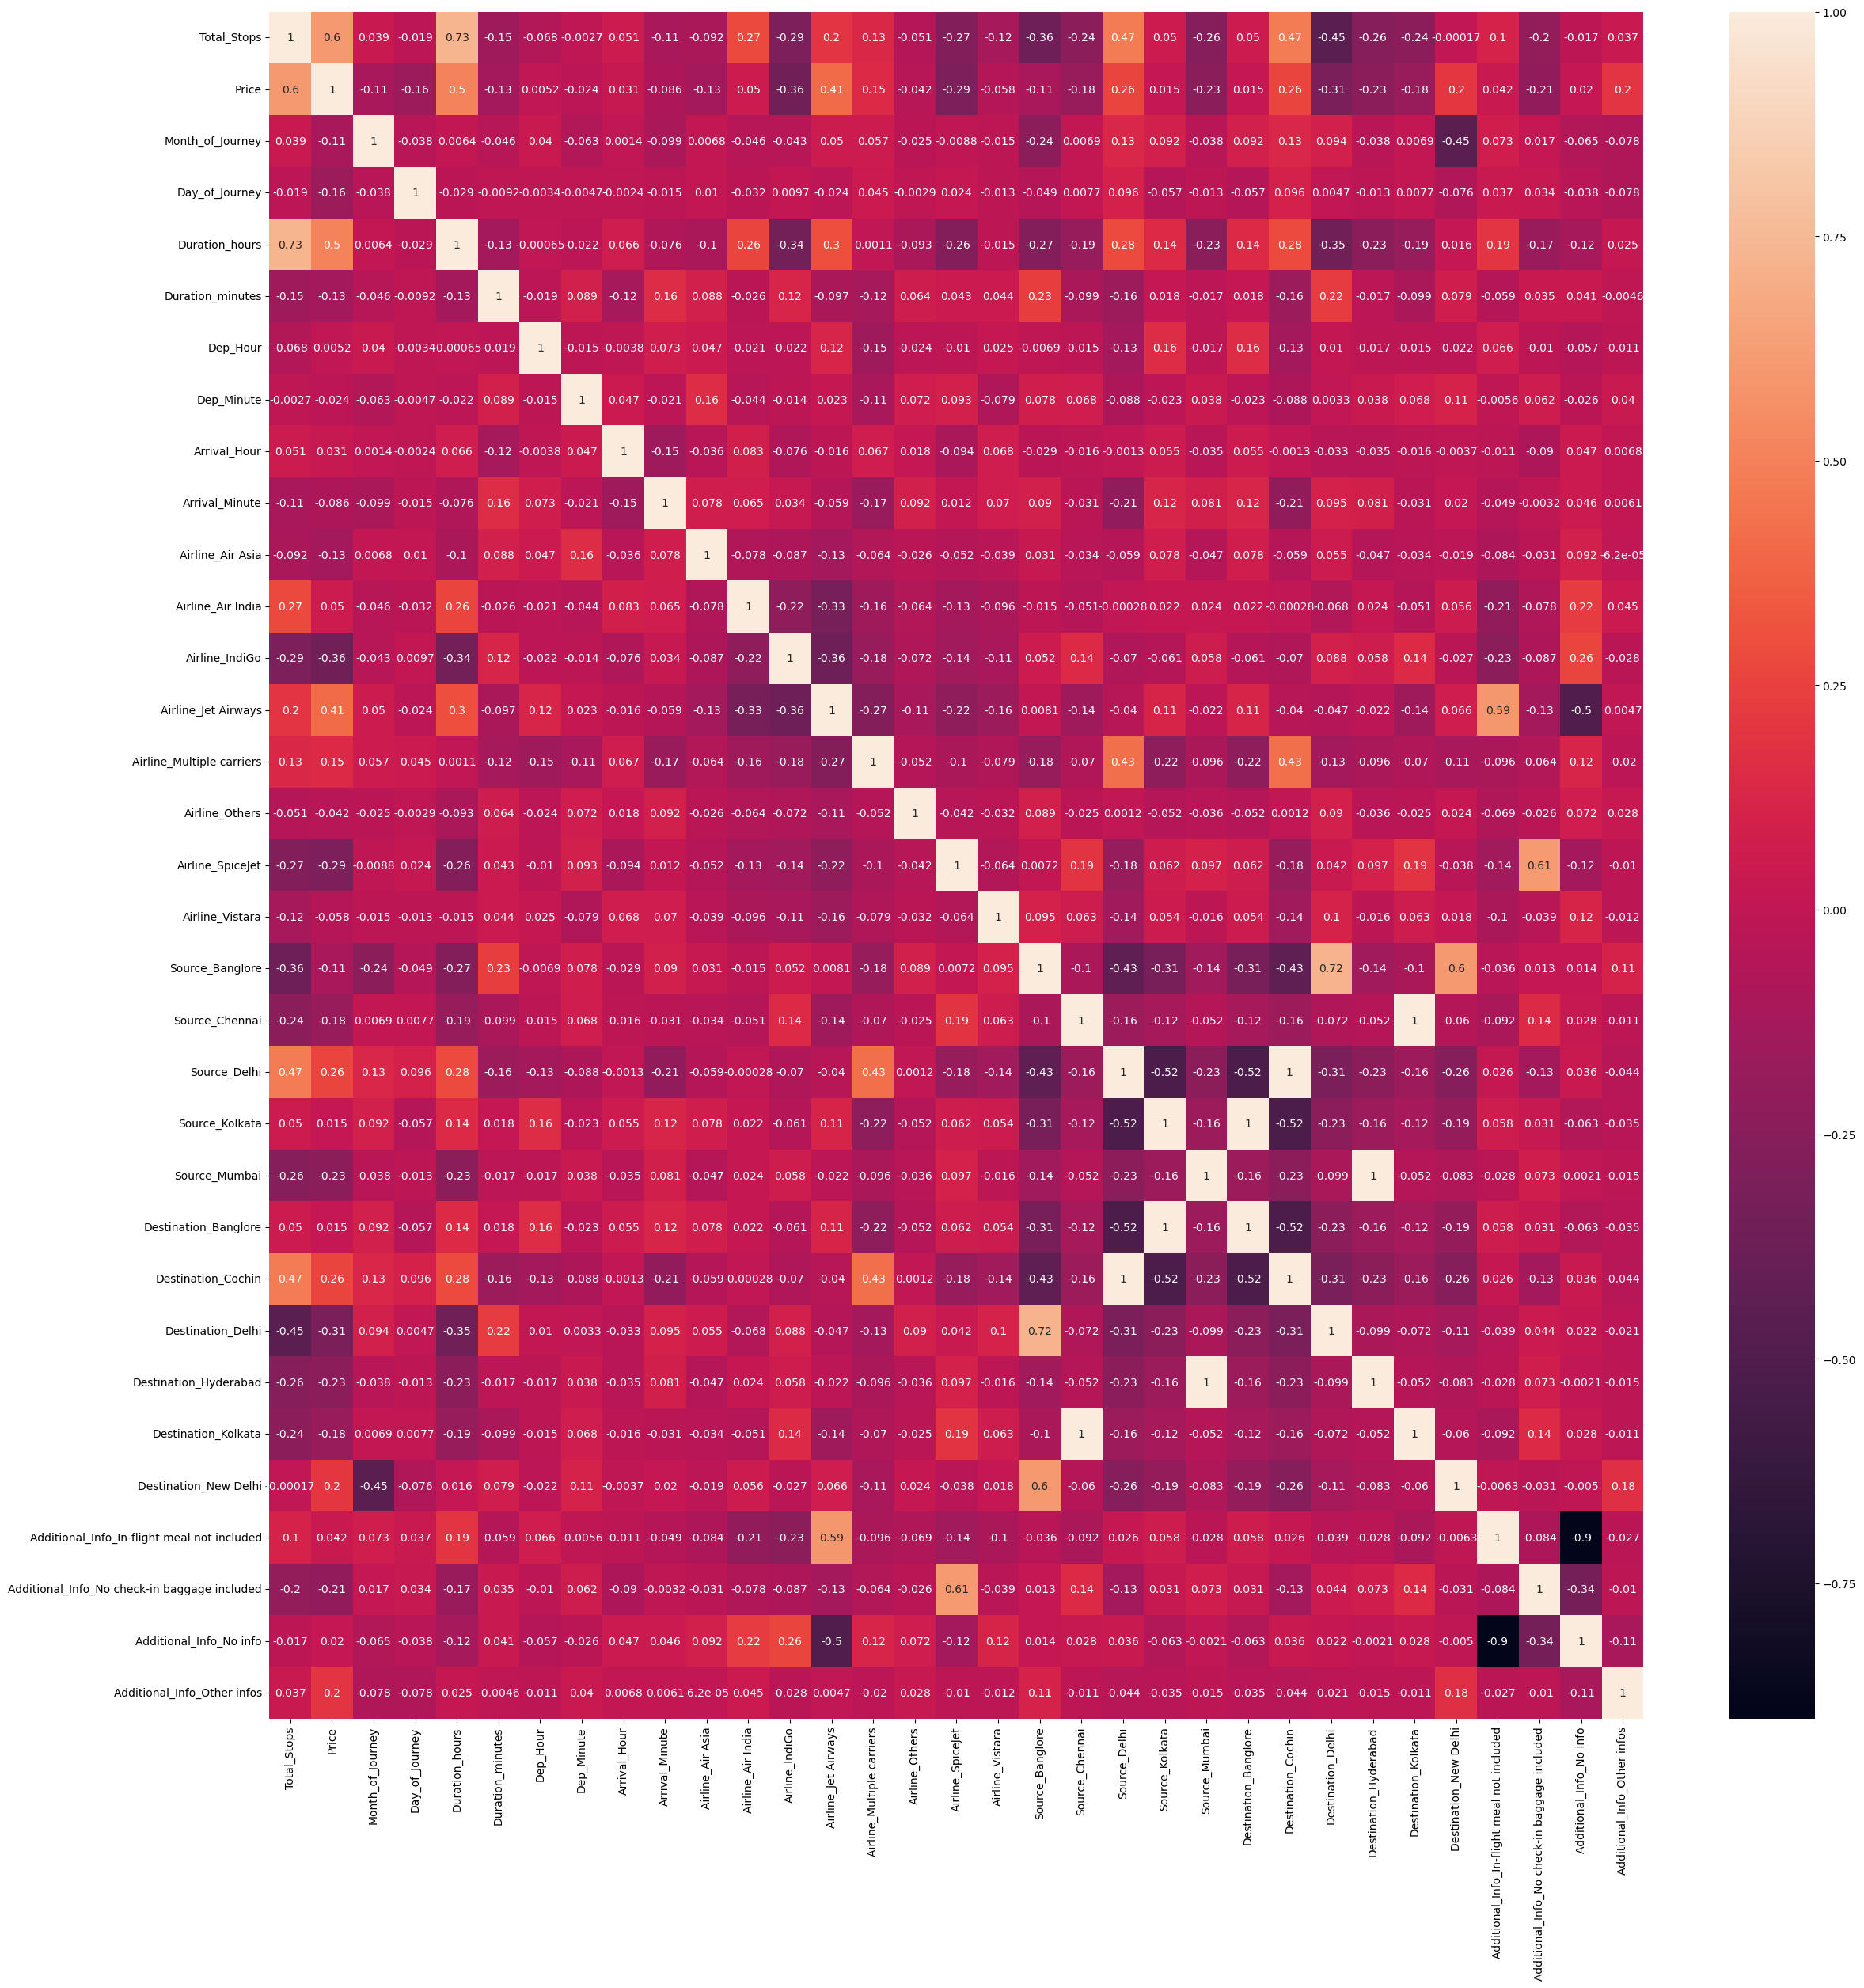

In [45]:
#correlation
plt.figure(figsize=(28, 28))
sns.heatmap(flight_pred.corr(),annot=True)

In [46]:
result=flight_pred.corr()
result>0.8

,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air Asia,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Other infos
Total_Stops,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Month_of_Journey,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Day_of_Journey,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Duration_hours,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Duration_minutes,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Dep_Hour,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Dep_Minute,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Arrival_Hour,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Arrival_Minute,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Inference
1. All the columns are correlated either moderate or low. No columns are highly correlated

In [47]:
#checking skewness
flight_pred.skew()

Total_Stops                                      0.332309
Price                                            1.857490
Month_of_Journey                                -0.377535
Day_of_Journey                                   0.124628
Duration_hours                                   0.892650
Duration_minutes                                -0.085870
Dep_Hour                                         0.108306
Dep_Minute                                       0.171301
Arrival_Hour                                    -0.378978
Arrival_Minute                                   0.110802
Airline_Air Asia                                 5.462256
Airline_Air India                                1.835779
Airline_IndiGo                                   1.537610
Airline_Jet Airways                              0.612250
Airline_Multiple carriers                        2.424511
Airline_Others                                   6.726525
Airline_SpiceJet                                 3.150260
Airline_Vistar

In [48]:
# Since Price and Duration hours have high skewness, lets do logarithmic transformation for Price and Square root transformation for Duration Hours
flight_pred['Price'] = np.log1p(flight_pred['Price'])
flight_pred['Duration_hours'] = np.sqrt(flight_pred['Duration_hours'])
flight_pred.skew()

Total_Stops                                      0.332309
Price                                           -0.228106
Month_of_Journey                                -0.377535
Day_of_Journey                                   0.124628
Duration_hours                                   0.317564
Duration_minutes                                -0.085870
Dep_Hour                                         0.108306
Dep_Minute                                       0.171301
Arrival_Hour                                    -0.378978
Arrival_Minute                                   0.110802
Airline_Air Asia                                 5.462256
Airline_Air India                                1.835779
Airline_IndiGo                                   1.537610
Airline_Jet Airways                              0.612250
Airline_Multiple carriers                        2.424511
Airline_Others                                   6.726525
Airline_SpiceJet                                 3.150260
Airline_Vistar

In [49]:
#Split the independent and dependent columns
Y=flight_pred["Price"]
X=flight_pred.drop("Price",axis=1)

# Scaling 

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaleddata=scaler.fit_transform(X)

In [51]:
flightdataframe=pd.DataFrame(scaleddata,columns=X.columns)

In [52]:
X=flightdataframe

In [53]:
Y

0        8.268219
1        8.944159
2        9.538420
3        8.735364
4        9.495745
           ...   
10678    8.320692
10679    8.329899
10680    8.885994
10681    9.445333
10682    9.371949
Name: Price, Length: 10462, dtype: float64

In [54]:
#Split the data to train and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7846, 32)
(2616, 32)
(7846,)
(2616,)


# Model Building

Since the dataset contains numerical features along with a continuous target variable, we will begin model building using a linear regression approach.

In [56]:
#Linear Regression
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

LinReg=LinearRegression()

In [57]:
#Support Vector Regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

SVRmodel=SVR()

In [58]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)

In [59]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [None, 10, 20, 30],         # Limit depth to reduce overfitting
    'min_samples_split': [2,5,10],         # Minimum samples to split a node
}
rf = RandomForestRegressor(random_state=42)
rf_model = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

In [60]:
#XGBoost
from xgboost import XGBRegressor
xgmodel = XGBRegressor()

In [61]:
#CatBoost
from catboost import CatBoostRegressor
CBmodel = CatBoostRegressor(verbose=0)

In [62]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
adamodel = AdaBoostRegressor(n_estimators=100, random_state=42)

In [63]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and train
gbmodel = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [64]:
#Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
# Use a pipeline to standardize data for NN
nn_pipeline = Pipeline([
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

In [65]:
#Run the model with train and test dataset and store results
models= {
    "Linear Regression":LinReg,
    "Decision Tree":dt_model,
    "RandomForest":rf_model,
    "SVM":SVRmodel,
    "XGBoost":xgmodel,
    "CatBoost":CBmodel,
    "AdaBoost":adamodel,
    "Gradient Boost":gbmodel,
    "Neural Network":nn_pipeline
}
result={}
train_result={}
predictedvalues={}
for name,model in models.items():
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    print(model)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    mse_train = mean_squared_error(Y_train, y_pred_train)
    mae_train = mean_absolute_error(Y_train, y_pred_train)
    r2_train = r2_score(Y_train, y_pred_train)
    result[name] = {
            "MSE": round(mse * 100,2),
            "MAE": round(mae * 100,2),
            "R2": round(r2 * 100,2),
            "MSE_train": round(mse_train * 100,2),
            "MAE_train": round(mae_train * 100,2),
            "R2_train": round(r2_train * 100,2)
        }
    predictedvalues[name]=y_pred
    print(f"\nModel: {name}")
    print('R2_score is: ',round(r2,2))
    print('R2_score for trained data : ',round(r2_train,2))
    print('Mean_Absolute_Error is: ',round(mae,2))
    print('Mean_Squared_Error is: ',round(mse,2))
    print('-----------------------------------------------')

LinearRegression()

Model: Linear Regression
R2_score is:  0.76
R2_score for trained data :  0.76
Mean_Absolute_Error is:  0.19
Mean_Squared_Error is:  0.06
-----------------------------------------------
DecisionTreeRegressor(max_depth=5, random_state=42)

Model: Decision Tree
R2_score is:  0.79
R2_score for trained data :  0.79
Mean_Absolute_Error is:  0.17
Mean_Squared_Error is:  0.06
-----------------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

Model: RandomForest
R2_score is:  0.93
R2_score for trained data :  0.99
Mean_Absolute_Error is:  0.08
Mean_Squared_Error is:  0.02
-----------------------------------------------
SVR()

Model: SVM
R2_scor

In [66]:
from pprint import pprint

pprint(result)

{'AdaBoost': {'MAE': 24.99,
              'MAE_train': 24.75,
              'MSE': 9.02,
              'MSE_train': 8.69,
              'R2': 66.31,
              'R2_train': 67.08},
 'CatBoost': {'MAE': 8.55,
              'MAE_train': 6.71,
              'MSE': 1.67,
              'MSE_train': 0.93,
              'R2': 93.76,
              'R2_train': 96.49},
 'Decision Tree': {'MAE': 17.31,
                   'MAE_train': 16.87,
                   'MSE': 5.65,
                   'MSE_train': 5.43,
                   'R2': 78.89,
                   'R2_train': 79.43},
 'Gradient Boost': {'MAE': 13.89,
                    'MAE_train': 13.31,
                    'MSE': 3.62,
                    'MSE_train': 3.28,
                    'R2': 86.48,
                    'R2_train': 87.59},
 'Linear Regression': {'MAE': 18.94,
                       'MAE_train': 18.89,
                       'MSE': 6.39,
                       'MSE_train': 6.32,
                       'R2': 76.15,
          

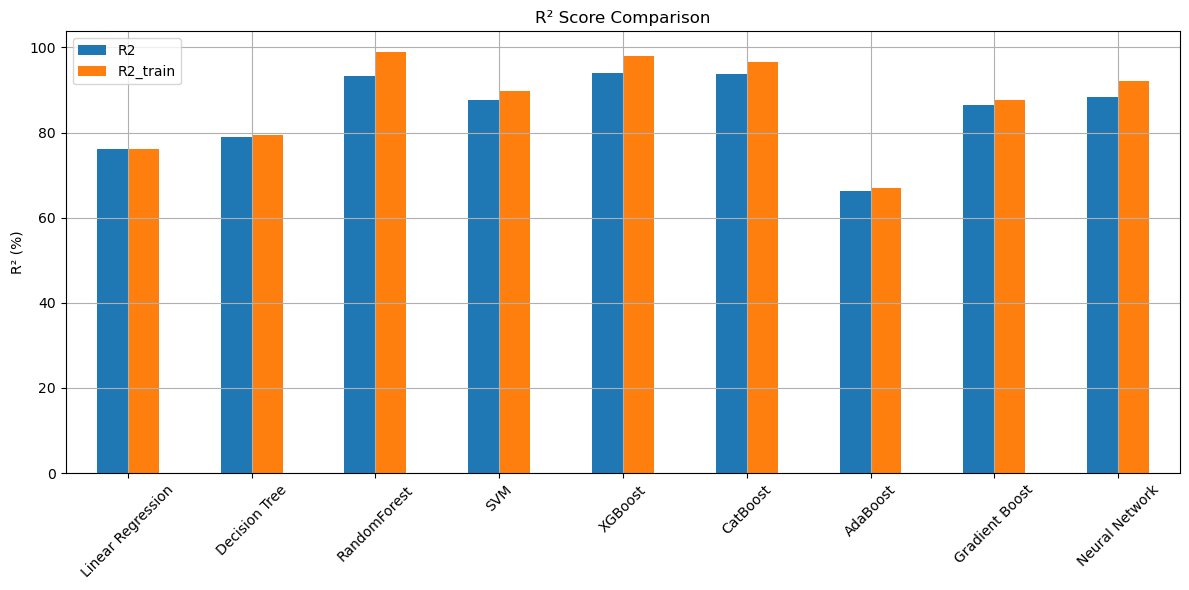

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrame
df = pd.DataFrame(result).T  # Replace with your actual dict

# Plot R2 comparison
df[['R2', 'R2_train']].plot(kind='bar', figsize=(12, 6))
plt.title("R² Score Comparison")
plt.ylabel("R² (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Inference
1. Random Forest,CatBoost and XGBoost provides good accuracy for this dataset
2. Random forest provides 93% r2 score with training accuracy 98%
3. XGBoost and CatBoost provides ~94% accuracy with training accuracy ~97%

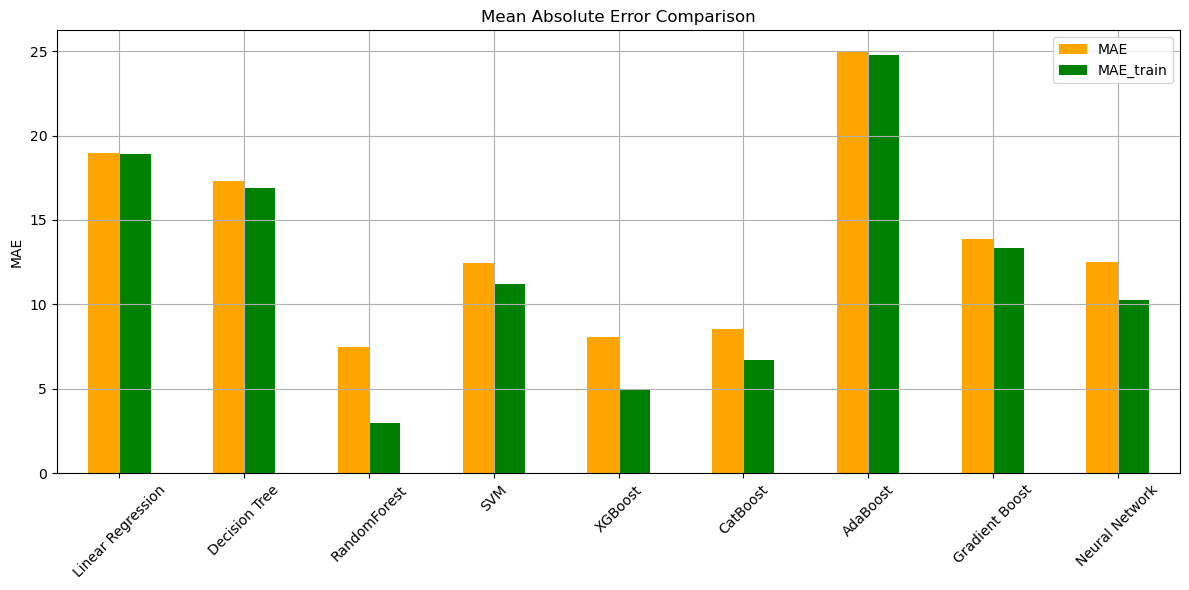

In [68]:
df[['MAE', 'MAE_train']].plot(kind='bar', figsize=(12, 6), color=['orange', 'green'])
plt.title("Mean Absolute Error Comparison")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Inference
1. As inferred from above, AdaBoost has maximum mean absolute error followed by Linear Regression and Decision tree models

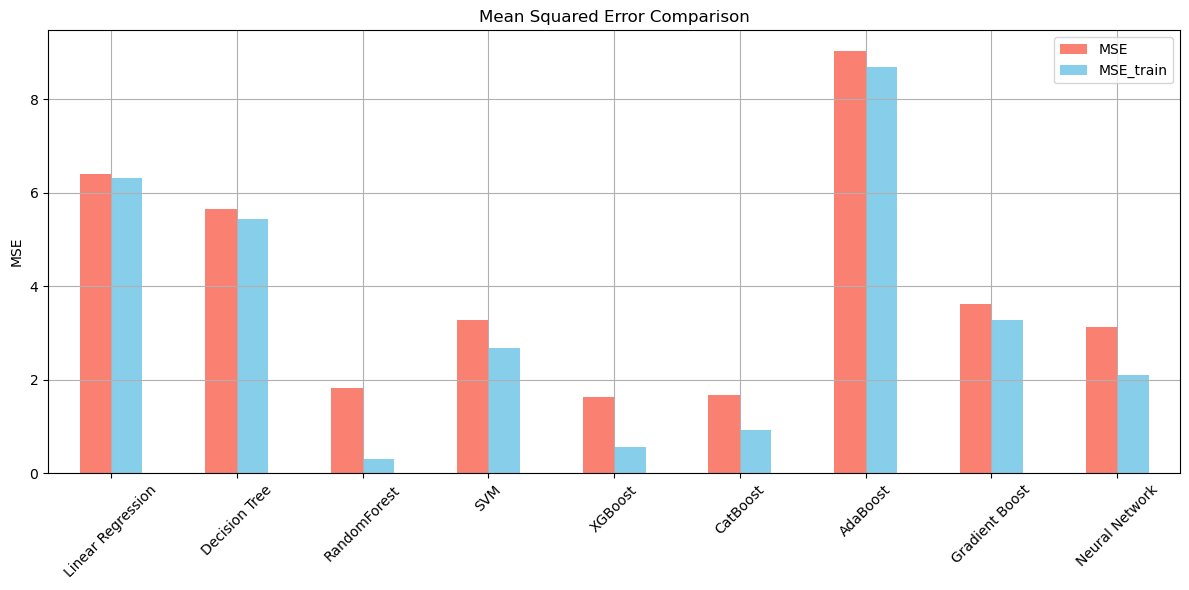

In [69]:
df[['MSE', 'MSE_train']].plot(kind='bar', figsize=(12, 6), color=['salmon', 'skyblue'])
plt.title("Mean Squared Error Comparison")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


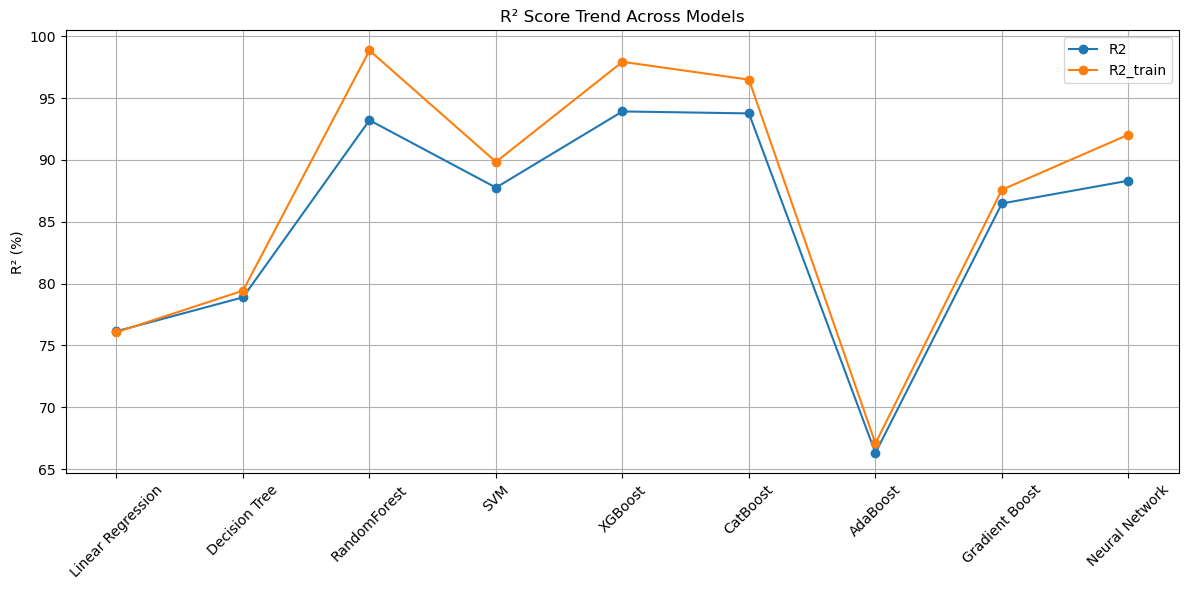

In [70]:
df[['R2', 'R2_train']].plot(kind='line', marker='o', figsize=(12, 6))
plt.title("R² Score Trend Across Models")
plt.ylabel("R² (%)")
plt.grid(True)
plt.xticks(ticks=range(len(df.index)), labels=df.index, rotation=45)
plt.tight_layout()
plt.show()


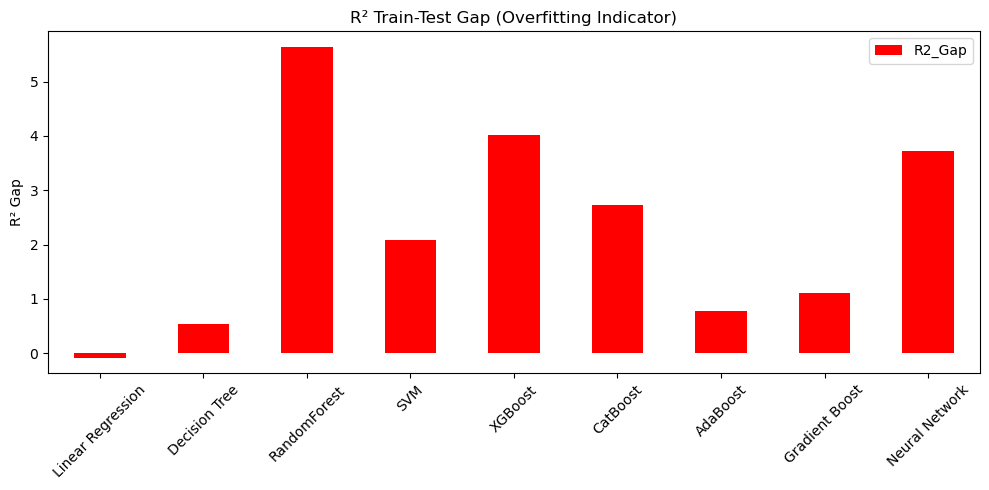

In [71]:
df['R2_Gap'] = df['R2_train'] - df['R2']
df[['R2_Gap']].plot(kind='bar', color='red', figsize=(10, 5))
plt.title("R² Train-Test Gap (Overfitting Indicator)")
plt.ylabel("R² Gap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference
1. With above graph, we conclude that random forest model contains 5% gap for R2 score. This indicates slight overfitting in model which is in acceptable level in most common practices
2. In XGBoost mode, we got gap as 4% and model got accuracy score of ~ 94%
3. Models Linear Regression and Decision Tree have less R2 score Gap indicating less overfitting for the models.

In [72]:
# Report Creation
report_df = pd.DataFrame(result).T  # .T to transpose
report_df['R2_Gap'] = report_df['R2_train'] - report_df['R2']

In [73]:
report_df

,MSE,MAE,R2,MSE_train,MAE_train,R2_train,R2_Gap
Linear Regression,6.39,18.94,76.15,6.32,18.89,76.07,-0.08
Decision Tree,5.65,17.31,78.89,5.43,16.87,79.43,0.54
RandomForest,1.82,7.50,93.21,0.30,2.97,98.85,5.64
SVM,3.28,12.45,87.76,2.68,11.19,89.84,2.08
XGBoost,1.63,8.05,93.92,0.55,4.96,97.93,4.01
CatBoost,1.67,8.55,93.76,0.93,6.71,96.49,2.73
AdaBoost,9.02,24.99,66.31,8.69,24.75,67.08,0.77
Gradient Boost,3.62,13.89,86.48,3.28,13.31,87.59,1.11
Neural Network,3.13,12.50,88.32,2.10,10.24,92.04,3.72


In [74]:
report_df.to_excel("model_report.xlsx")

# Final Observations

## Data Preprocessing

### Initial Observations:

* "Price" is skewed and requires transformation.
* Most columns are categorical.
* Presence of unwanted characters and inconsistent formatting.

### Steps Taken:

1. Converted "Date\_of\_Journey" to day and month.
2. Split "Duration" into hours and minutes.
3. Extracted hour and minute from "Dep\_Time" and "Arrival\_Time".
4. Dropped irrelevant columns like "Route" after extracting necessary info.
5. Encoded categorical columns using One-Hot Encoding.
6. Scaled features using StandardScaler.
7. Combined rare categories in airline and additional info to avoid high skewness.


## Exploratory Data Analysis (EDA)

### Key Insights:

* **Jet Airways** had the highest number of flights.
* **Delhi** is the most common source; **Cochin** is the most common destination.
* **Non-stop and 1-stop** flights are the most common.
* Most flight prices are **under Rs. 20,000**, with the majority between **Rs. 5,000 and Rs. 10,000**.
* Business class flights (especially by Jet Airways) are the most expensive.
* **May** had the highest number of flights, **April** the least.
* Several categorical features were sparse and required grouping (e.g., Additional\_Info).

---

## Feature Engineering

* Encoded categorical values using OneHotEncoding.
* Scaled numerical features.
* Handled skewness from features like Price using `log1p` transformation.
* Grouped rare values in categorical features to reduce dimensionality.

---

## Model Building & Evaluation

Multiple models were trained and evaluated using MAE, MSE, and R2 scores on both train and test datasets.

| Model             | R2 (Test) | R2 (Train) | MAE (Test) | MAE (Train) | MSE (Test) | MSE (Train) |
| ----------------- | --------- | ---------- | ---------- | ----------- | ---------- | ----------- |
| AdaBoost          | 66.31     | 67.08      | 24.99      | 24.75       | 9.02       | 8.69        |
| CatBoost          | 93.76     | 96.49      | 8.55       | 6.71        | 1.67       | 0.93        |
| Decision Tree     | 78.89     | 79.43      | 17.31      | 16.87       | 5.65       | 5.43        |
| Gradient Boost    | 86.48     | 87.59      | 13.89      | 13.31       | 3.62       | 3.28        |
| Linear Regression | 76.15     | 76.07      | 18.94      | 18.89       | 6.39       | 6.32        |
| Neural Network    | 88.32     | 92.04      | 12.50      | 10.24       | 3.13       | 2.10        |
| Random Forest     | 93.21     | 98.85      | 7.50       | 2.97        | 1.82       | 0.30        |
| SVM               | 87.76     | 89.84      | 12.45      | 11.19       | 3.28       | 2.68        |
| XGBoost           | **93.92** | **97.93**  | 8.05       | 4.96        | 1.63       | 0.55        |

### Final Recommendation:

* **XGBoost** and **CatBoost** show the best balance between high accuracy and generalization.
* **RandomForest** slightly overfits (5% R2 gap), but still acceptable.

---

## Challenges Faced

### 1. **Skewness in Target Column (Price):**

* Handled using `log1p()` transformation.

### 2. **Sparse Categorical Features:**

* Airline and Additional\_Info had rare categories that created noise.
* Merged such categories under 'Other' or 'Rare'.

### 3. **Feature Engineering Complexity:**

* Duration, Departure and Arrival times were text-based and required parsing.

### 4. **Overfitting:**

* Tree-based models like RandomForest had slight overfitting (Train R2 > 98%, Test R2 \~93%).
* Controlled using hyperparameter tuning and cross-validation.

### 5. **Outliers:**

* Some flights priced abnormally high (e.g., Jet Airways Business).
* Detected and handled using boxplot visualization and capping.

---

## Conclusion

* The project successfully built an accurate flight price prediction model.
* XGBoost and CatBoost models are production-ready with >93% R2 score.
* With proper preprocessing, encoding, and outlier handling, the model shows excellent generalization on test data.
